In [0]:
!pip install -q albumentations

     |████████████████████████████████| 634kB 2.8MB/s 


In [0]:
import torch
from matplotlib import pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
from albumentations import (Flip, Rotate,Blur,OneOf,Compose)

In [0]:

train_set = torchvision.datasets.MNIST(root='',download=True)
num_classes = len(train_set.classes)

In [0]:
class MNISTDataset(Dataset):

    def __init__(self,X_train,y_train,transforms=None,preprocessing=None):
        super(MNISTDataset,self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.transforms = transforms
        self.preprocessing = preprocessing

    def __getitem__(self,idx):
        x = self.X_train[idx]
        y = self.y_train[idx]
        if self.transforms != None:
            x = self.transforms(image=x.numpy())
            x = x['image']

        return x, y

    def __len__(self):
        return len(self.X_train)

In [0]:
aug = Compose([Flip(), Rotate(limit=40), Blur(blur_limit=9)])

In [0]:
batch_size = 10
mnist_dataset = MNISTDataset(train_set.data,train_set.targets,transforms=aug)
mnist_dataloader = DataLoader(mnist_dataset,batch_size=batch_size,shuffle=True,num_workers=4)

In [0]:
batch = iter(mnist_dataloader)
images, labels = next(batch)

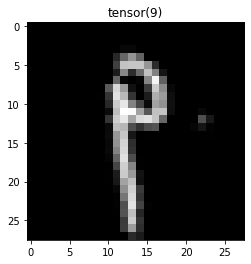

In [0]:
plt.imshow(images[7].numpy(),cmap='gray')
plt.title(labels[7]);